In [ ]:
# Required modules

import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the data

data = pd.read_csv("Appendix 2 EN Steels.csv")
data.head()

,Sl. No.,C,Si,Mn,P,Ni,Cr,Mo,Mn/S,CR,TT,YS,UTS,EL,RA,IS
0,1,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,38,580,934,1019,18.0,54.0,35
1,2,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,16,620,736,845,22.0,59.0,42
2,3,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,16,605,785,888,21.0,60.0,72
3,4,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,7,625,693,824,21.5,57.0,43
4,5,0.35,0.19,1.50,0.026,0.93,0.57,0.18,75,7,650,681,839,21.5,58.0,89


In [ ]:
# Inspecting the data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sl. No.  140 non-null    int64  
 1   C        140 non-null    float64
 2   Si       140 non-null    float64
 3   Mn       140 non-null    float64
 4   P        140 non-null    float64
 5   Ni       140 non-null    float64
 6   Cr       140 non-null    float64
 7   Mo       140 non-null    float64
 8   Mn/S     140 non-null    int64  
 9   CR       140 non-null    int64  
 10  TT       140 non-null    int64  
 11  YS       140 non-null    int64  
 12  UTS      140 non-null    int64  
 13  EL       140 non-null    float64
 14  RA       140 non-null    float64
 15  IS       140 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 17.6 KB


,Sl. No.,C,Si,Mn,P,Ni,Cr,Mo,Mn/S,CR,TT,YS,UTS,EL,RA,IS
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,0.374929,0.264643,0.984143,0.030721,0.819143,0.437357,0.173500,36.614286,24.850000,589.571429,808.678571,933.300000,21.160714,56.342857,57.564286
std,40.5586,0.030429,0.045824,0.509700,0.005088,0.129673,0.081423,0.031278,25.803236,27.747299,67.053843,150.265150,127.840768,3.426656,6.460195,21.887288
min,1.0000,0.320000,0.190000,0.330000,0.020000,0.560000,0.210000,0.110000,8.000000,3.000000,400.000000,543.000000,707.000000,13.000000,31.000000,15.000000
25%,35.7500,0.350000,0.250000,0.330000,0.030000,0.740000,0.430000,0.150000,8.000000,7.000000,550.000000,692.000000,839.000000,18.500000,52.500000,42.000000
50%,70.5000,0.360000,0.250000,1.260000,0.032000,0.890000,0.430000,0.160000,40.000000,12.000000,600.000000,789.500000,912.000000,21.000000,57.000000,60.000000
75%,105.2500,0.400000,0.300000,1.400000,0.034000,0.910000,0.490000,0.200000,49.000000,38.000000,642.500000,914.000000,1019.000000,23.625000,61.500000,75.000000
max,140.0000,0.440000,0.370000,1.510000,0.038000,1.080000,0.570000,0.250000,86.000000,118.000000,700.000000,1194.000000,1295.000000,29.000000,67.500000,94.000000


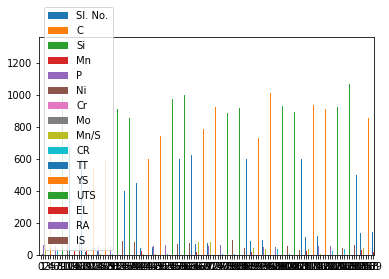

In [ ]:
# bar graph for whole dataset
df.plot.bar(rot=0)

In [ ]:
#create a dataframe with all training data except the target column
X = data[['C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S', 'CR', 'TT']]
# X = df.drop(columns=['YS', 'UTS', 'EL', 'RA', 'IS'])

# convert column "a" of a DataFrame
# X['Mn/S'] = pd.to_numeric(X['Mn/S'])

#check that the target variable has been removed
# X.head()
# list(X.keys())
X.dtypes

C       float64
Si      float64
Mn      float64
P       float64
Ni      float64
Cr      float64
Mo      float64
Mn/S      int64
CR        int64
TT        int64
dtype: object

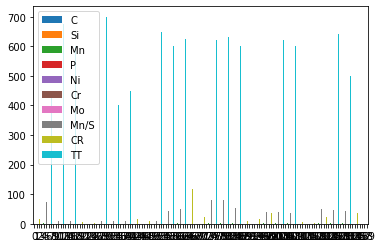

In [ ]:
# bar graph for whole dataset
X.plot.bar(rot=0)

In [ ]:
#create a dataframe with all training data except the target column
Y = data[['YS', 'UTS', 'EL', 'RA', 'IS']]

#check that the target variable has been removed
Y.head()

,YS,UTS,EL,RA,IS
0,934,1019,18.0,54.0,35
1,736,845,22.0,59.0,42
2,785,888,21.0,60.0,72
3,693,824,21.5,57.0,43
4,681,839,21.5,58.0,89


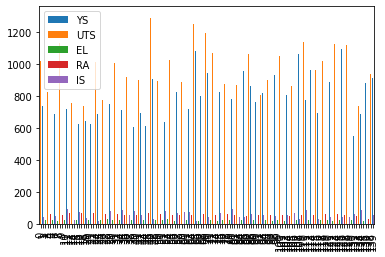

In [ ]:
# bar graph
Y.plot.bar()

In [ ]:
# Scaling the data

X_scale = MinMaxScaler()
y_scale = MinMaxScaler()

X_scaled = X_scale.fit_transform(X)
y_scaled = y_scale.fit_transform(Y)

In [ ]:
# Train and Test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size=0.75) 

In [ ]:
# Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(11, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='linear')
])

In [ ]:
# Custom loss

def rmse(y_true, y_pred):
    return tf.math.sqrt(tf.keras.losses.mean_squared_error(y_true, y_pred))

In [ ]:
# compile model using mse as a measure of model performance

optim = tf.keras.optimizers.SGD(learning_rate=0.0025, momentum=0.9)
loss = tf.keras.losses.mean_squared_error

model.compile(optimizer=optim, loss=loss, metrics = [rmse])

In [ ]:
# Fitting the model

model.fit(X_train, y_train, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9044 - rmse: 0.9067
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 1.0177 - rmse: 0.9623
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7589 - rmse: 0.8303
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6445 - rmse: 0.7667
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5610 - rmse: 0.7156
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4959 - rmse: 0.6767
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4491 - rmse: 0.6390
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4116 - rmse: 0.6118
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4052 - rmse: 0.6113
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3834 - rmse: 0.5862
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - los

In [ ]:
# Saving the model

model.save_weights('model.hdf5')

In [ ]:
model.load_weights('model.hdf5')

In [ ]:
train_pred = model.predict(X_train)
# train_pred[:, 0]
y_train[:, 0]

array([0.9124424 , 0.52073733, 0.37173579, 0.83870968, 0.33333333,
       0.32718894, 0.1797235 , 0.15668203, 0.4546851 , 0.25652842,
       0.44393241, 0.56989247, 0.75883257, 0.48387097, 0.35637481,
       0.        , 1.        , 0.3609831 , 0.38095238, 0.6328725 ,
       0.3609831 , 0.80030722, 0.30875576, 0.6328725 , 0.7265745 ,
       0.61904762, 0.50384025, 0.48387097, 0.39631336, 0.12749616,
       0.7265745 , 0.21658986, 0.67895545, 0.38095238, 0.02304147,
       0.05529954, 0.44086022, 0.52995392, 0.56989247, 0.23041475,
       0.22887865, 0.64208909, 0.21505376, 0.21658986, 0.4500768 ,
       0.19047619, 0.28725038, 0.15207373, 0.12288786, 0.61443932,
       0.67281106, 0.87096774, 0.14746544, 0.82488479, 0.0952381 ,
       0.06912442, 0.39938556, 0.39016897, 0.47926267, 0.47619048,
       0.03533026, 0.42703533, 0.1843318 , 0.95084485, 0.10445469,
       0.55760369, 0.61443932, 0.28725038, 0.60215054, 0.28725038,
       0.95238095, 0.23041475, 0.31029186, 0.2688172 , 0.36098

In [ ]:
np.mean(loss(train_pred, y_train))

0.05592378195156834

In [ ]:
# Etr

def etr(actual, predicted):
    return np.mean(np.abs(actual, predicted))

In [ ]:
# Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                121       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 60        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test[0].reshape(-1, 1).shape

(10, 1)

In [ ]:
# Predictions

predicted = model.predict(X_test[0].reshape(1, -1))
pd.DataFrame(columns=['YS', 'UTS', 'EL', 'RA', 'IS'], data=predicted)

,YS,UTS,EL,RA,IS
0,0.404053,0.367918,0.489914,0.671816,0.522655


In [ ]:
y_scale.inverse_transform(predicted)

array([[806.03827 , 923.33606 ,  20.838627,  55.52127 ,  56.289757]],
      dtype=float32)